In [14]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation



In [4]:
# Authors Dataset

authors = pd.read_csv("./data/authors.csv")
authors.head()

,source_id,first_name,last_name,institution
0,27,Alan,Murray,NaN
1,27,Anthony,Smith,NaN
2,27,Zoe,Butler,NaN
3,63,Yaser,Abu-Mostafa,NaN
4,60,Michael,Fleisher,NaN


In [6]:
print (authors.info())
authors.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30237 entries, 0 to 30236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_id    30237 non-null  int64 
 1   first_name   30236 non-null  object
 2   last_name    30234 non-null  object
 3   institution  17302 non-null  object
dtypes: int64(1), object(3)
memory usage: 945.0+ KB
None


source_id          0
first_name         1
last_name          3
institution    12935
dtype: int64

In [7]:
# Paper dataset

papers = pd.read_csv("./data/papers.csv")
papers.head()

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...


In [8]:
print (papers.info())
print (papers.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source_id  9680 non-null   int64 
 1   year       9680 non-null   int64 
 2   title      9680 non-null   object
 3   abstract   6361 non-null   object
 4   full_text  9677 non-null   object
dtypes: int64(2), object(3)
memory usage: 378.3+ KB
None
source_id       0
year            0
title           0
abstract     3319
full_text       3
dtype: int64


In [9]:
# Impute the missing values
# It will impute the na column with title if it's na, use the original value if not

papers['full_text'] = np.where(papers['full_text'].isna(), papers['title'], papers['full_text'])
papers['abstract'] = np.where(papers['abstract'].isna(), papers['title'], papers['abstract'])

In [10]:
papers.isna().sum()

source_id    0
year         0
title        0
abstract     0
full_text    0
dtype: int64

# Preprocessing
### TF-IDF

In [17]:
# transforming the title using tf-idf (9680 titles containing 3397 unique words)

tfidf = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b')
dtm = tfidf.fit_transform(papers['title'])

dtm.shape

(9680, 3397)

In [18]:
LDA = LatentDirichletAllocation(n_components=7, random_state=101)
LDA.fit(dtm)


LatentDirichletAllocation(n_components=7, random_state=101)

In [19]:
# 7 components and 3397 unique words
LDA.components_.shape

(7, 3397)

In [20]:
# In order to do this, we would need to apply the transform method on our LDA model and DTM to associate the topic to each
# article. Each title will be associated with probability for each LDA component
topic_results = LDA.transform(dtm)

# Now we will check the shape
topic_results.shape

(9680, 7)

In [22]:
# Probability of the first title to be associated to each topic (component)
topic_results[0]

array([0.05072517, 0.05017318, 0.05022285, 0.0502368 , 0.6981991 ,
       0.05017391, 0.05026899])

In [24]:
# Associating topic to each of the documents (index of highest probability)

papers['Topic'] = topic_results.argmax(axis=1)
papers.head(10)


,source_id,year,title,abstract,full_text,Topic
0,27,1987,Bit-Serial Neural Networks,Bit-Serial Neural Networks,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...,4
1,63,1987,Connectivity Versus Entropy,Connectivity Versus Entropy,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...,1
2,60,1987,The Hopfield Model with Multi-Level Neurons,The Hopfield Model with Multi-Level Neurons,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...,6
3,59,1987,How Neural Nets Work,How Neural Nets Work,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...,3
4,69,1987,Spatial Organization of Neural Networks: A Pro...,Spatial Organization of Neural Networks: A Pro...,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...,4
5,6,1987,A Neural-Network Solution to the Concentrator ...,A Neural-Network Solution to the Concentrator ...,775 \n\nA NEURAL-NETWORK SOLUTION TO THE C...,0
6,33,1987,LEARNING BY STATE RECURRENCE DETECTION,LEARNING BY STATE RECURRENCE DETECTION,642 \n\nLEARNING BY ST ATE RECURRENCE DETECfIO...,1
7,36,1987,Stability Results for Neural Networks,Stability Results for Neural Networks,554 \n\nSTABILITY RESULTS FOR NEURAL NETWORK...,4
8,35,1987,Introduction to a System for Implementing Neur...,Introduction to a System for Implementing Neur...,804 \n\nINTRODUCTION TO A SYSTEM FOR IMPLEMEN...,4
9,19,1987,Optimization with Artificial Neural Network Sy...,Optimization with Artificial Neural Network Sy...,474 \n\nOPTIMIZA nON WITH ARTIFICIAL NEURAL NE...,4


In [27]:
# print out the top 10 words with highest probabilities for all the ten topics. 

# Each topic is a vector of 3397 probabilities (for each unique word) for how much it matches the titles component.
# Take the top 10 words that have the highest probability to match the topic. For example the two words that match
# the first topic the most are "deep", "network"
for index, topic in enumerate(LDA.components_):
    print(f"THE TOP 15 WORDS FOR TOPIC #{index}")
    list_keywords = [tfidf.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    print(list_keywords)
    print("\n")

THE TOP 15 WORDS FOR TOPIC #0
['deep', 'network', 'using', 'speech', 'object', 'image', 'networks', 'recognition', 'neural', 'learning']


THE TOP 15 WORDS FOR TOPIC #1
['efficient', 'optimal', 'metric', 'sparse', 'task', 'kernel', 'boosting', 'reinforcement', 'multi', 'learning']


THE TOP 15 WORDS FOR TOPIC #2
['submodular', 'reduction', 'minimization', 'classification', 'analysis', 'adversarial', 'semi', 'bounds', 'supervised', 'learning']


THE TOP 15 WORDS FOR TOPIC #3
['visual', 'regression', 'model', 'process', 'models', 'processes', 'markov', 'gaussian', 'decision', 'learning']


THE TOP 15 WORDS FOR TOPIC #4
['stochastic', 'online', 'gradient', 'recurrent', 'policy', 'network', 'optimization', 'learning', 'networks', 'neural']


THE TOP 15 WORDS FOR TOPIC #5
['time', 'data', 'stochastic', 'rank', 'learning', 'variational', 'matrix', 'estimation', 'inference', 'models']


THE TOP 15 WORDS FOR TOPIC #6
['models', 'spiking', 'search', 'neurons', 'model', 'deep', 'memory', 'neural

Topic
2    1665
0    1511
5    1419
4    1397
1    1277
6    1220
3    1191
Name: count, dtype: int64

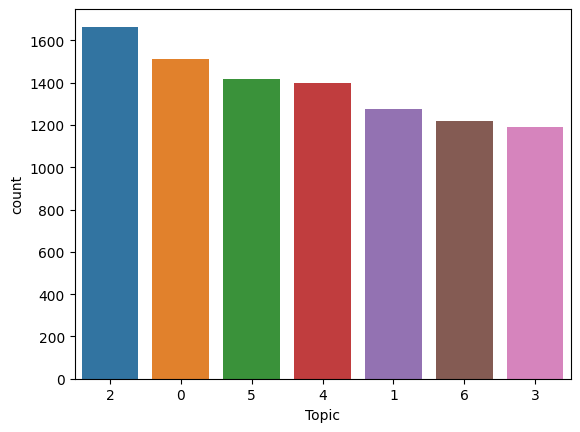

In [28]:
sns.countplot(x = 'Topic',
              data = papers,
              order = papers['Topic'].value_counts().index)

papers['Topic'].value_counts().sort_values(ascending=False)